In [1]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None, line=None):
    plt.figure(figsize=(15,2.5))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_l_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    
    #print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    #print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]
    
    p7v6_LL_total = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    p6v11_LL_total = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    
    for i, model in enumerate(models):        
        try:
            
            h = h5py.File('../mod_c/'+model)
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            #print fit_global['localfval'], fit_global['outerfval'], fit_global['innerfval']
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label='Base 2D',capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
#             #print h_base['/fit_results/GC/'].attrs.keys()
#             if i%mod==0:
#                 TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
#                 plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(132)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)
#     if 'spiral' in text:
#         plt.yscale('symlog')
#         plt.ylim(5e-7,2e-6)
    
#     plt.subplot(222)
#     plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
#     plt.xlabel(r'$\rm{E\ [GeV]}$')
#     plt.xscale('log')
#     plt.ylim(-50,200)
            
    plt.subplot(132)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
        
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line, yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    
    plt.hlines(p7v6_LL_total, -1, len(labels), color='purple')
    plt.hlines(p6v11_LL_total, -1, len(labels), color='purple')
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p6v11_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11', color='purple', fontsize=8)
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p7v6_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6', color='purple', fontsize=8)
               
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(133)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line,yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



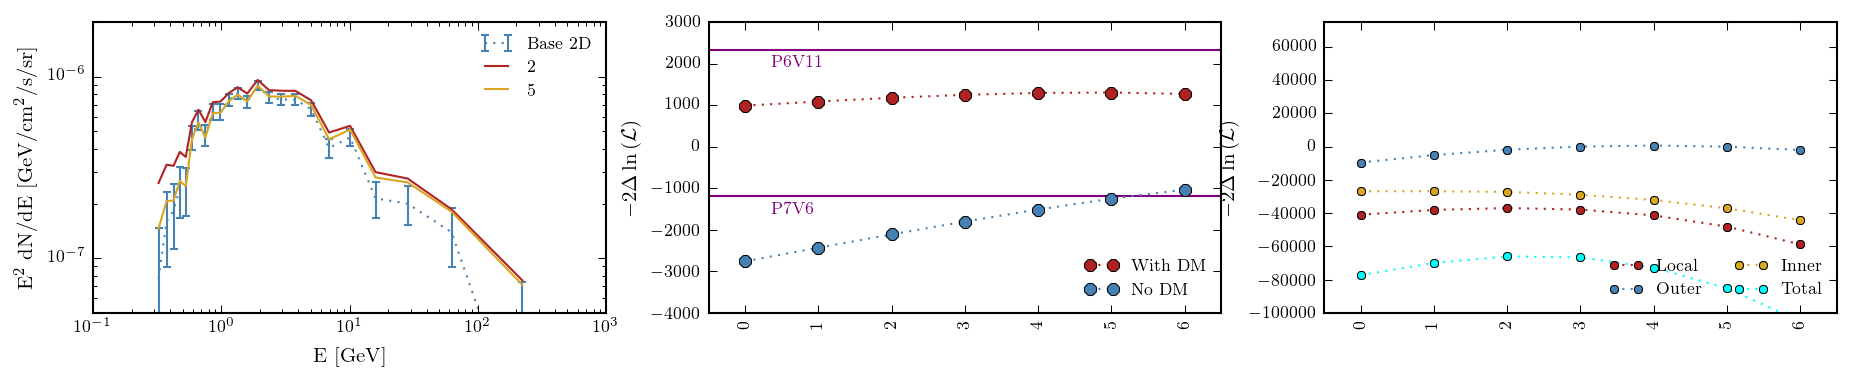

In [4]:

PlotSeries(start=0, stop=7, text='Spiral Fraction', labels=[str(i) for i in range(0,7)], mod=3, ylim=(-4e3,3e3), ylim_glob=(-1e5,.75e5))
plt.show()



# PEB HI+H2.
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

no results found for model  mod_l_7_XCO_stripped.hdf5
no results found for model  mod_l_8_XCO_stripped.hdf5
no results found for model  mod_l_9_XCO_stripped.hdf5
no results found for model  mod_l_10_XCO_stripped.hdf5


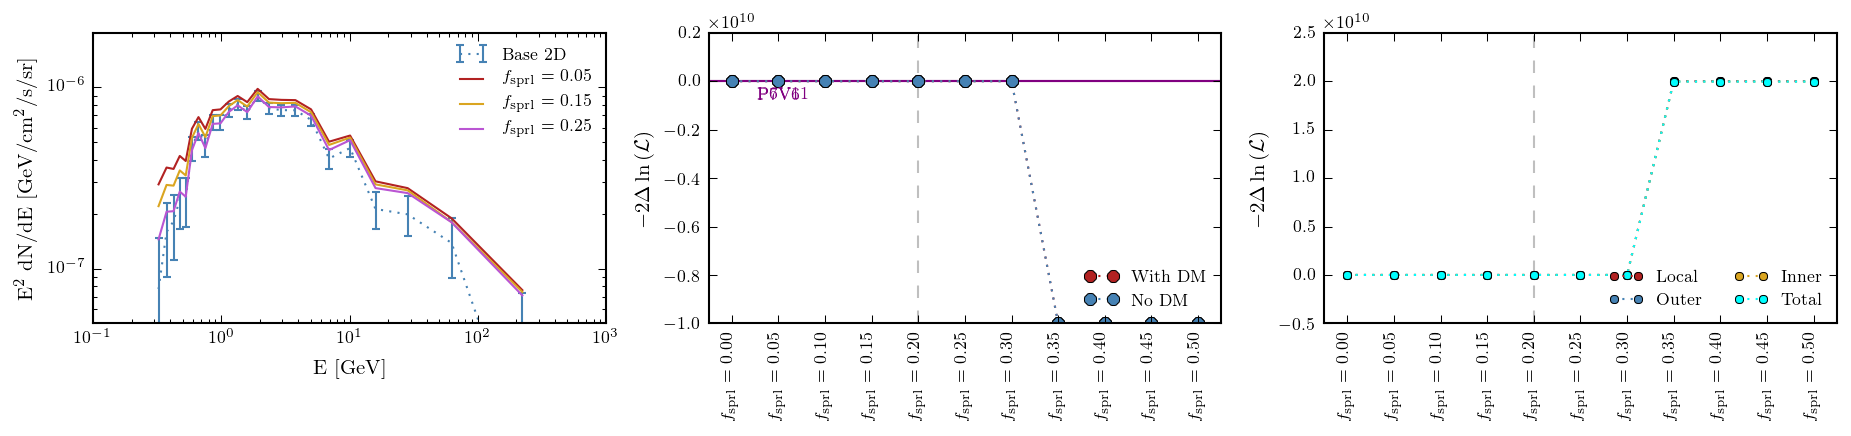

no results found for model  mod_l_11_XCO_stripped.hdf5
no results found for model  mod_l_12_XCO_stripped.hdf5
no results found for model  mod_l_13_XCO_stripped.hdf5
no results found for model  mod_l_14_XCO_stripped.hdf5
no results found for model  mod_l_15_XCO_stripped.hdf5
no results found for model  mod_l_16_XCO_stripped.hdf5
no results found for model  mod_l_17_XCO_stripped.hdf5
no results found for model  mod_l_18_XCO_stripped.hdf5
no results found for model  mod_l_19_XCO_stripped.hdf5
no results found for model  mod_l_20_XCO_stripped.hdf5
no results found for model  mod_l_21_XCO_stripped.hdf5
no results found for model  mod_l_22_XCO_stripped.hdf5
no results found for model  mod_l_23_XCO_stripped.hdf5


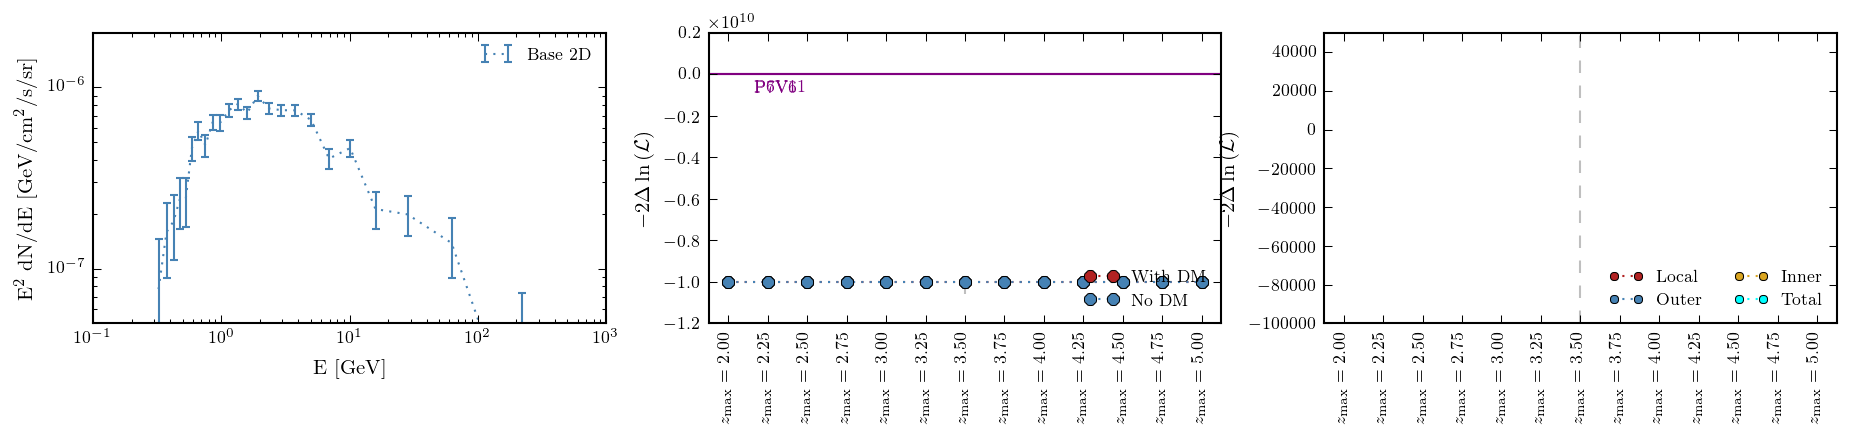

no results found for model  mod_l_24_XCO_stripped.hdf5
no results found for model  mod_l_25_XCO_stripped.hdf5
no results found for model  mod_l_26_XCO_stripped.hdf5
no results found for model  mod_l_27_XCO_stripped.hdf5


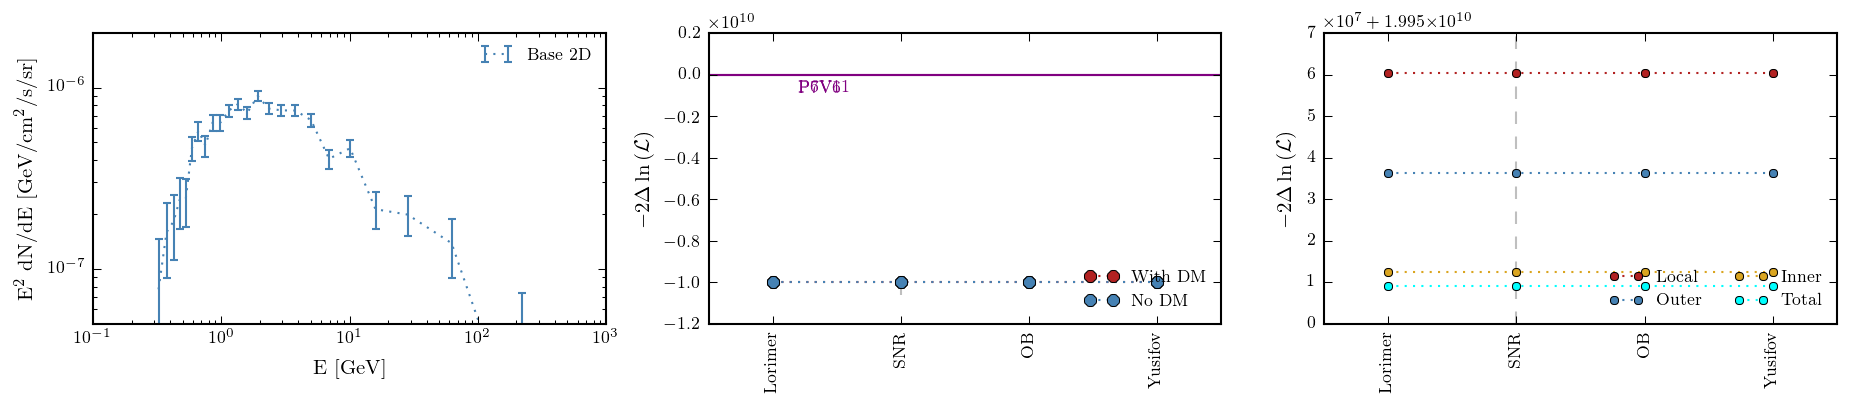

no results found for model  mod_l_28_XCO_stripped.hdf5
no results found for model  mod_l_29_XCO_stripped.hdf5
no results found for model  mod_l_30_XCO_stripped.hdf5
no results found for model  mod_l_31_XCO_stripped.hdf5


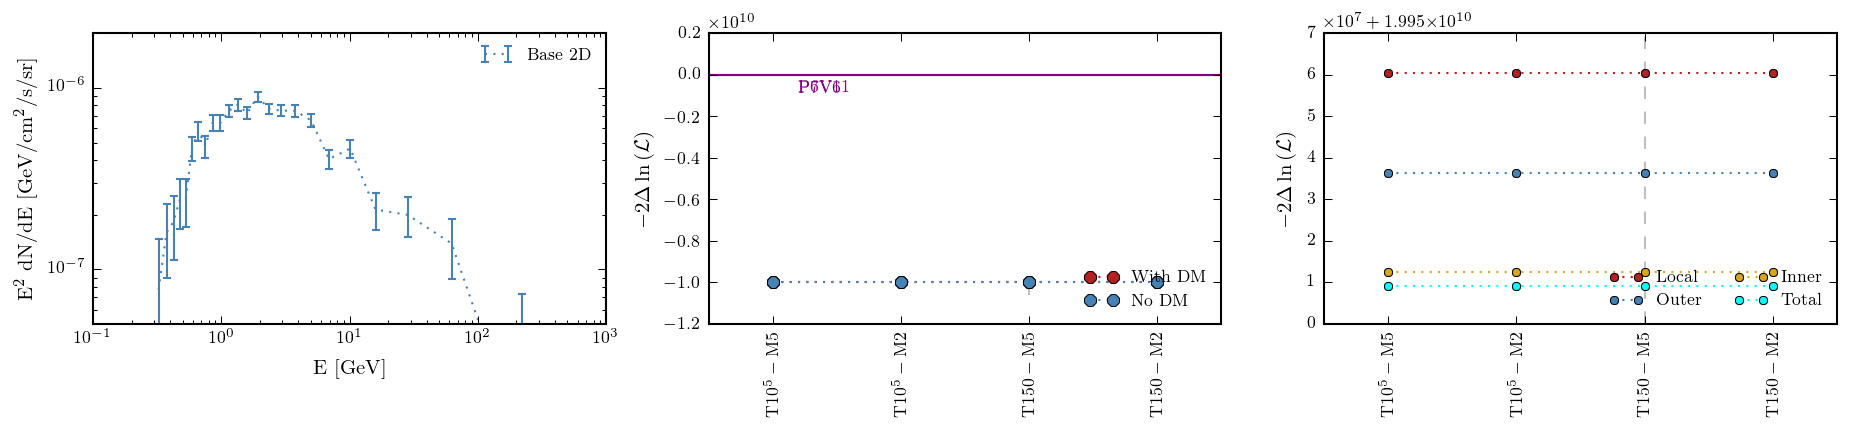

no results found for model  mod_l_32_XCO_stripped.hdf5
no results found for model  mod_l_33_XCO_stripped.hdf5
no results found for model  mod_l_35_XCO_stripped.hdf5
no results found for model  mod_l_36_XCO_stripped.hdf5
no results found for model  mod_l_37_XCO_stripped.hdf5
no results found for model  mod_l_38_XCO_stripped.hdf5
no results found for model  mod_l_39_XCO_stripped.hdf5
no results found for model  mod_l_40_XCO_stripped.hdf5
no results found for model  mod_l_41_XCO_stripped.hdf5
no results found for model  mod_l_42_XCO_stripped.hdf5


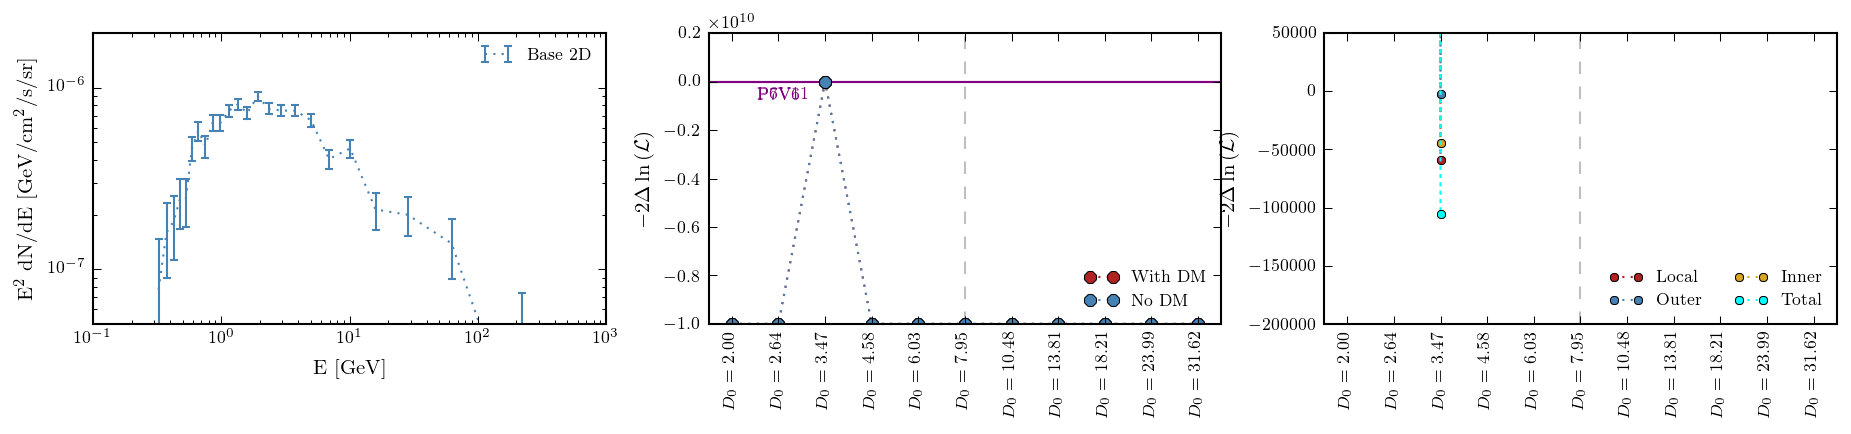

In [9]:

PlotSeries(start=0, stop=11, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11, stop=24, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24, stop=28, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28, stop=32, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32, stop=43, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


# Galrop HI, galprop H2.   

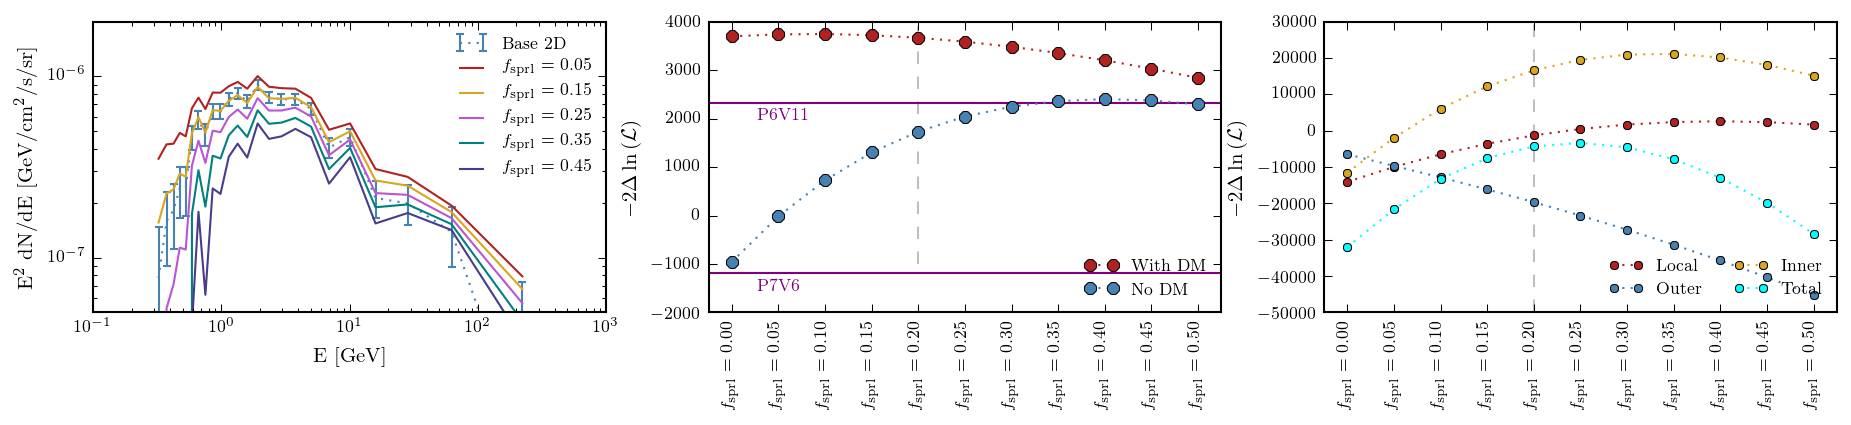

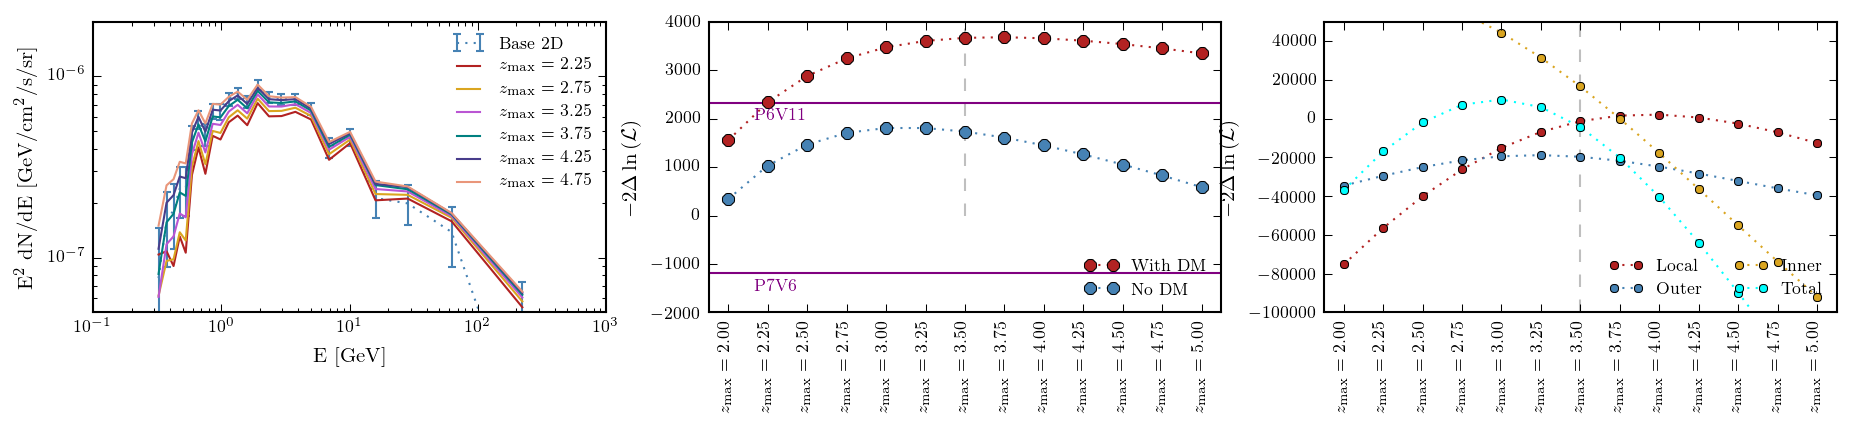

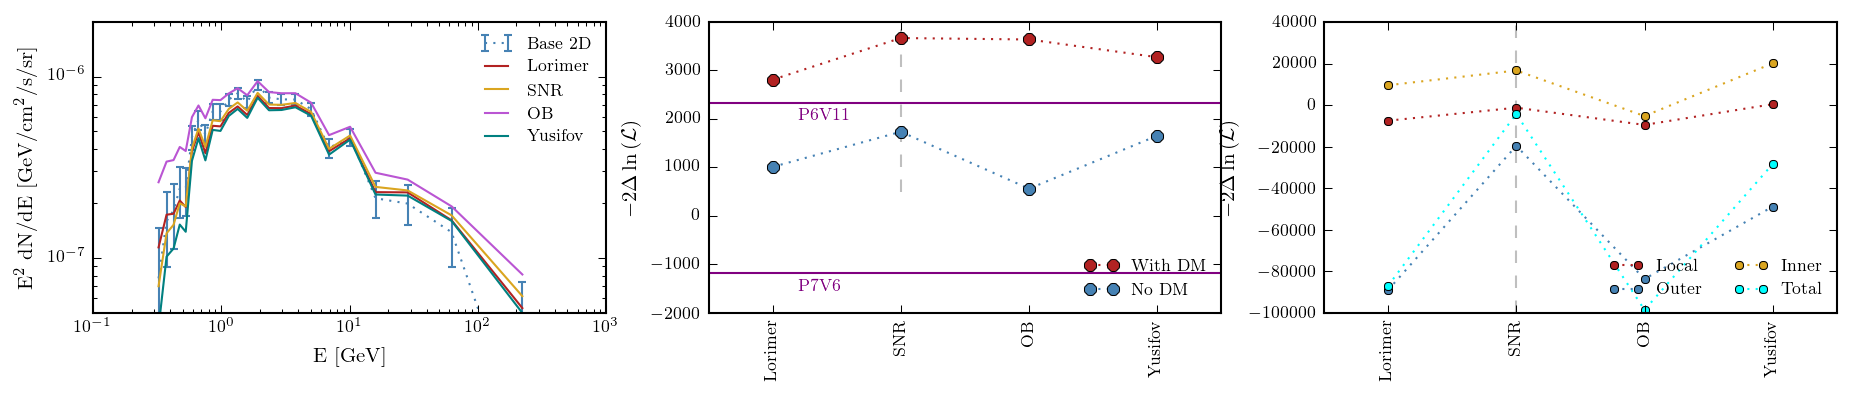

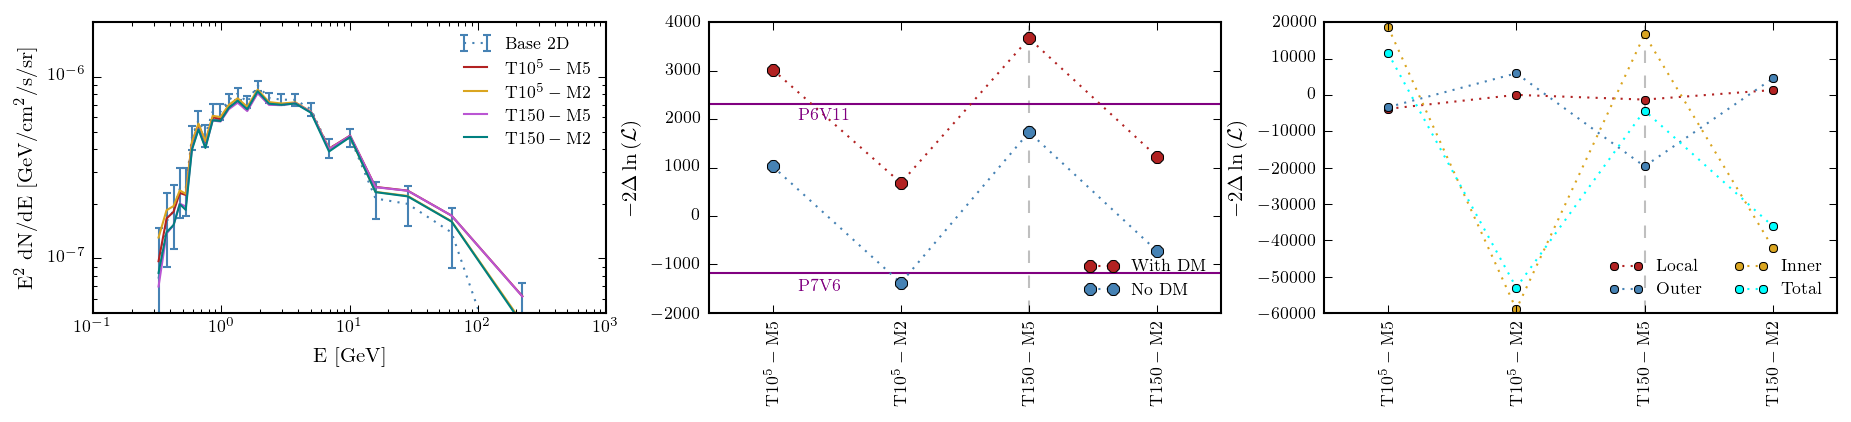

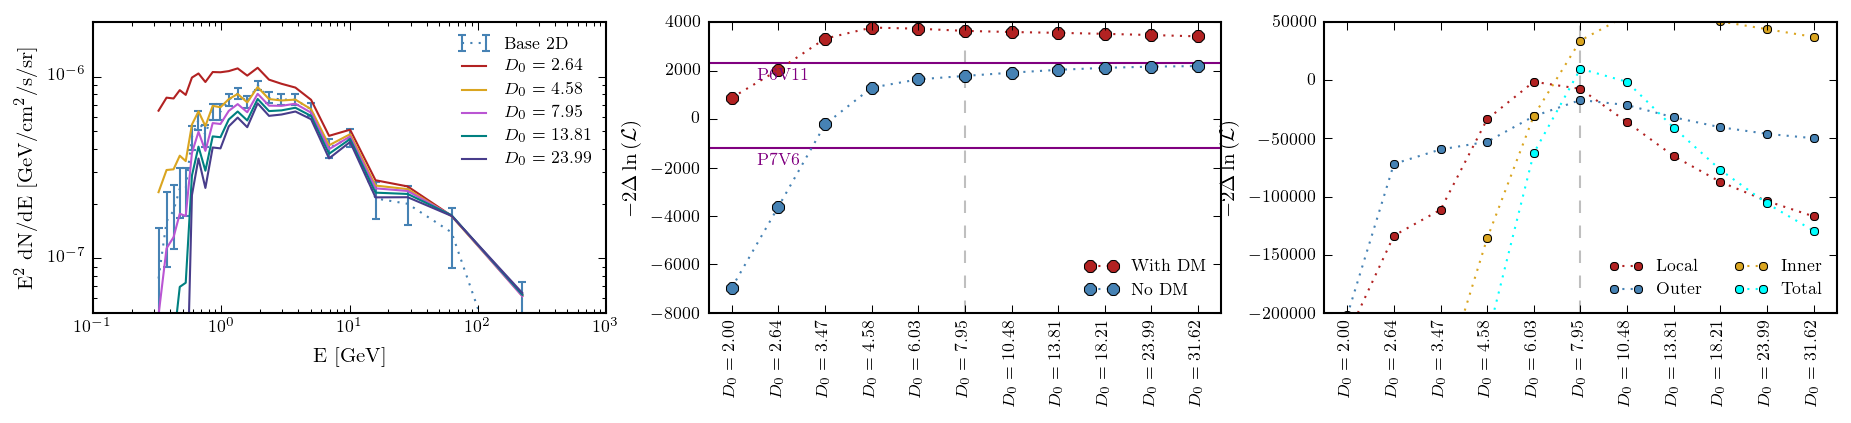

In [50]:

PlotSeries(start=0+43, stop=11+43, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11+43, stop=24+43, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24+43, stop=28+43, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28+43, stop=32+43, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32+43, stop=43+43, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


##F07 + Galprop r>1.5 kpc 

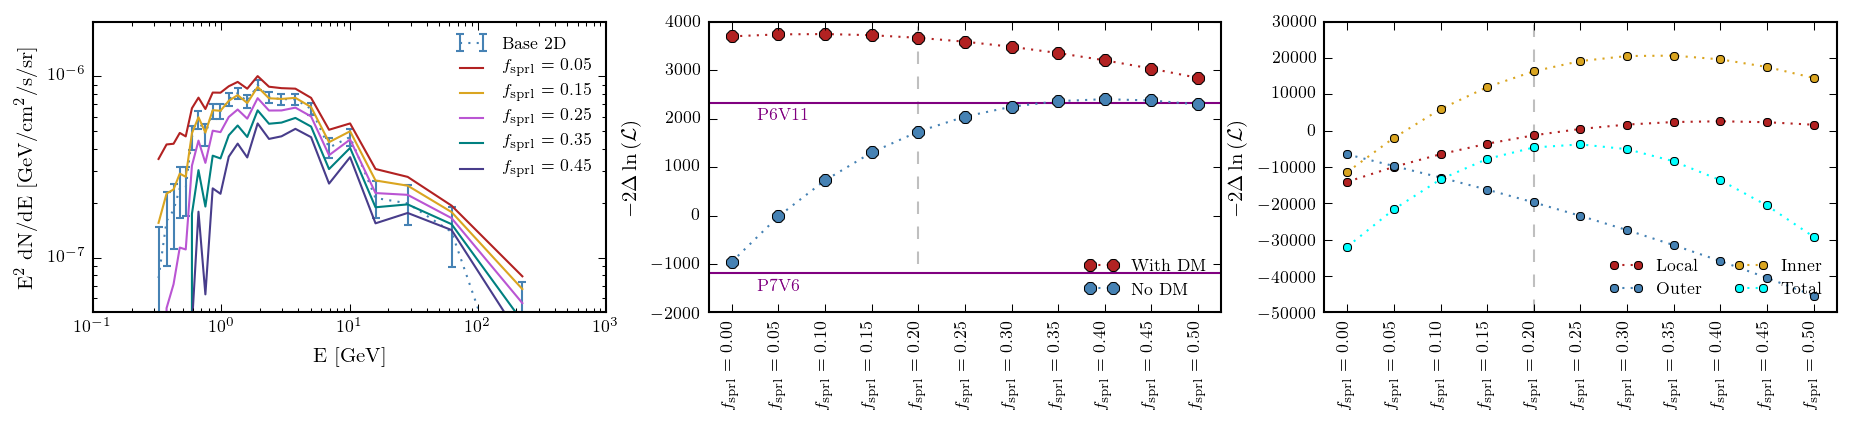

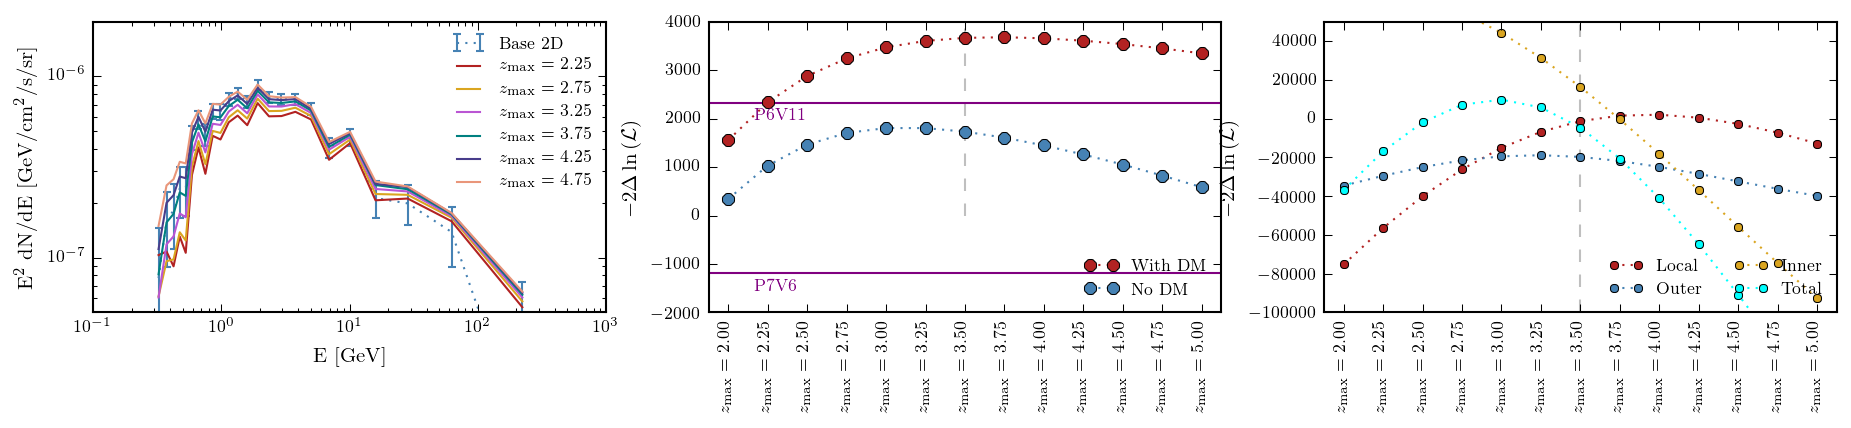

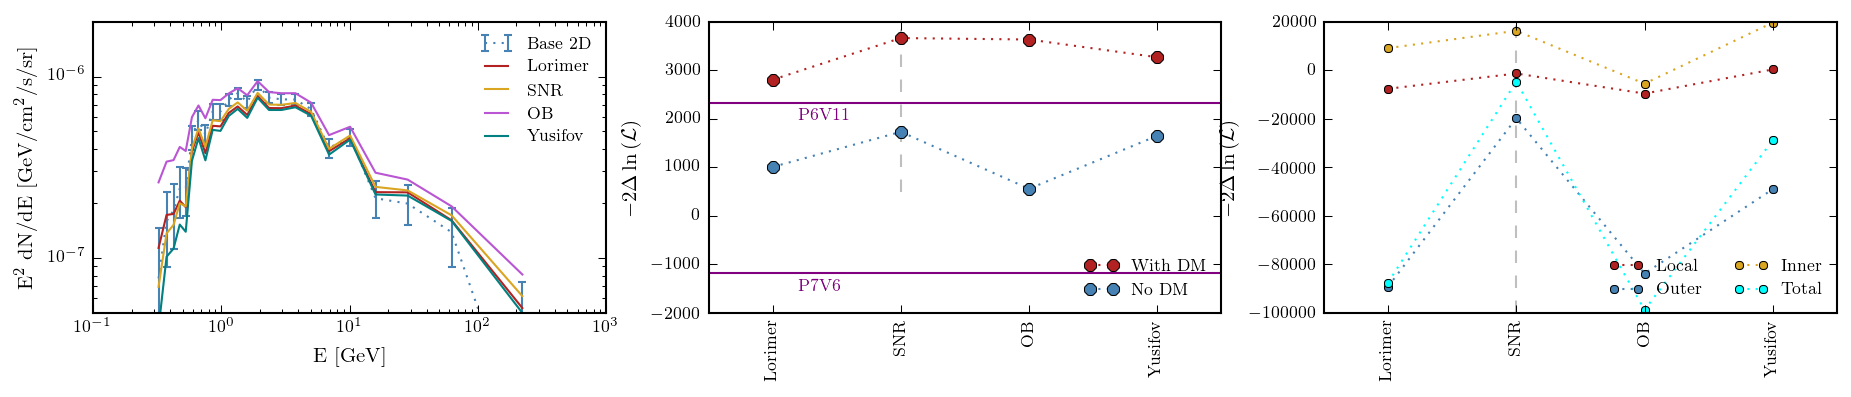

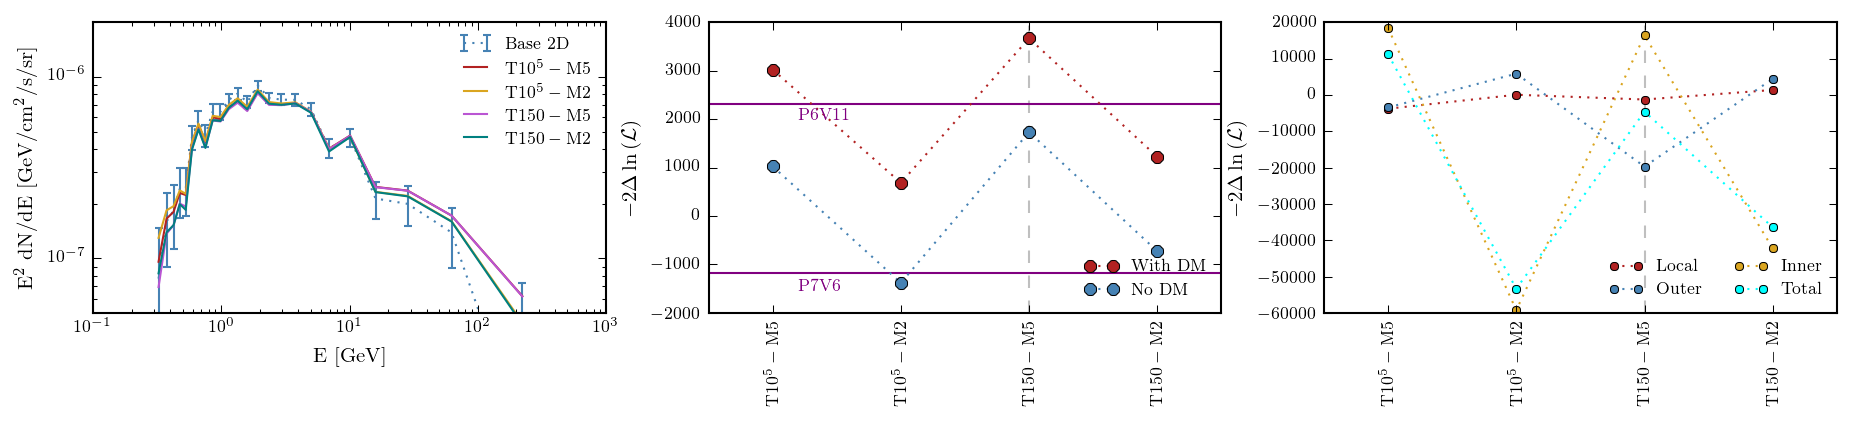

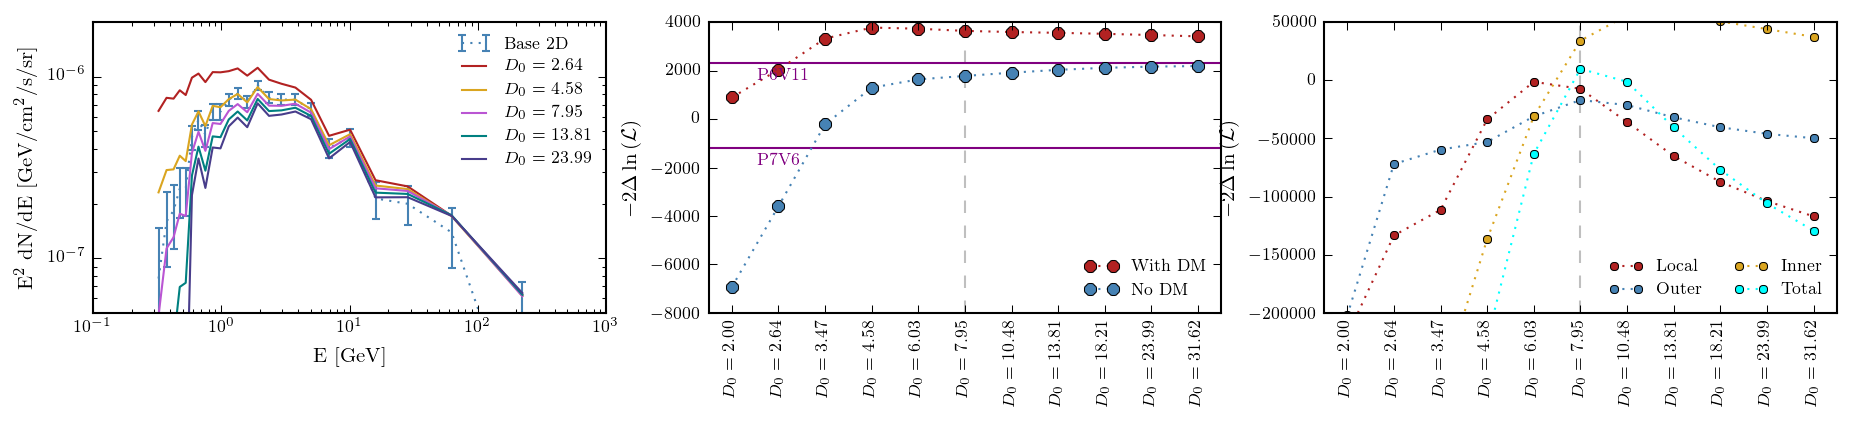

In [51]:

PlotSeries(start=0+86, stop=11+86, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11+86, stop=24+86, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24+86, stop=28+86, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28+86, stop=32+86, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32+86, stop=43+86, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


log-like, TS: center_high_res_no_dm -1186161.14316 -1349296.9978
log-like, TS: center_high_res -1186693.36627 -1350615.23474


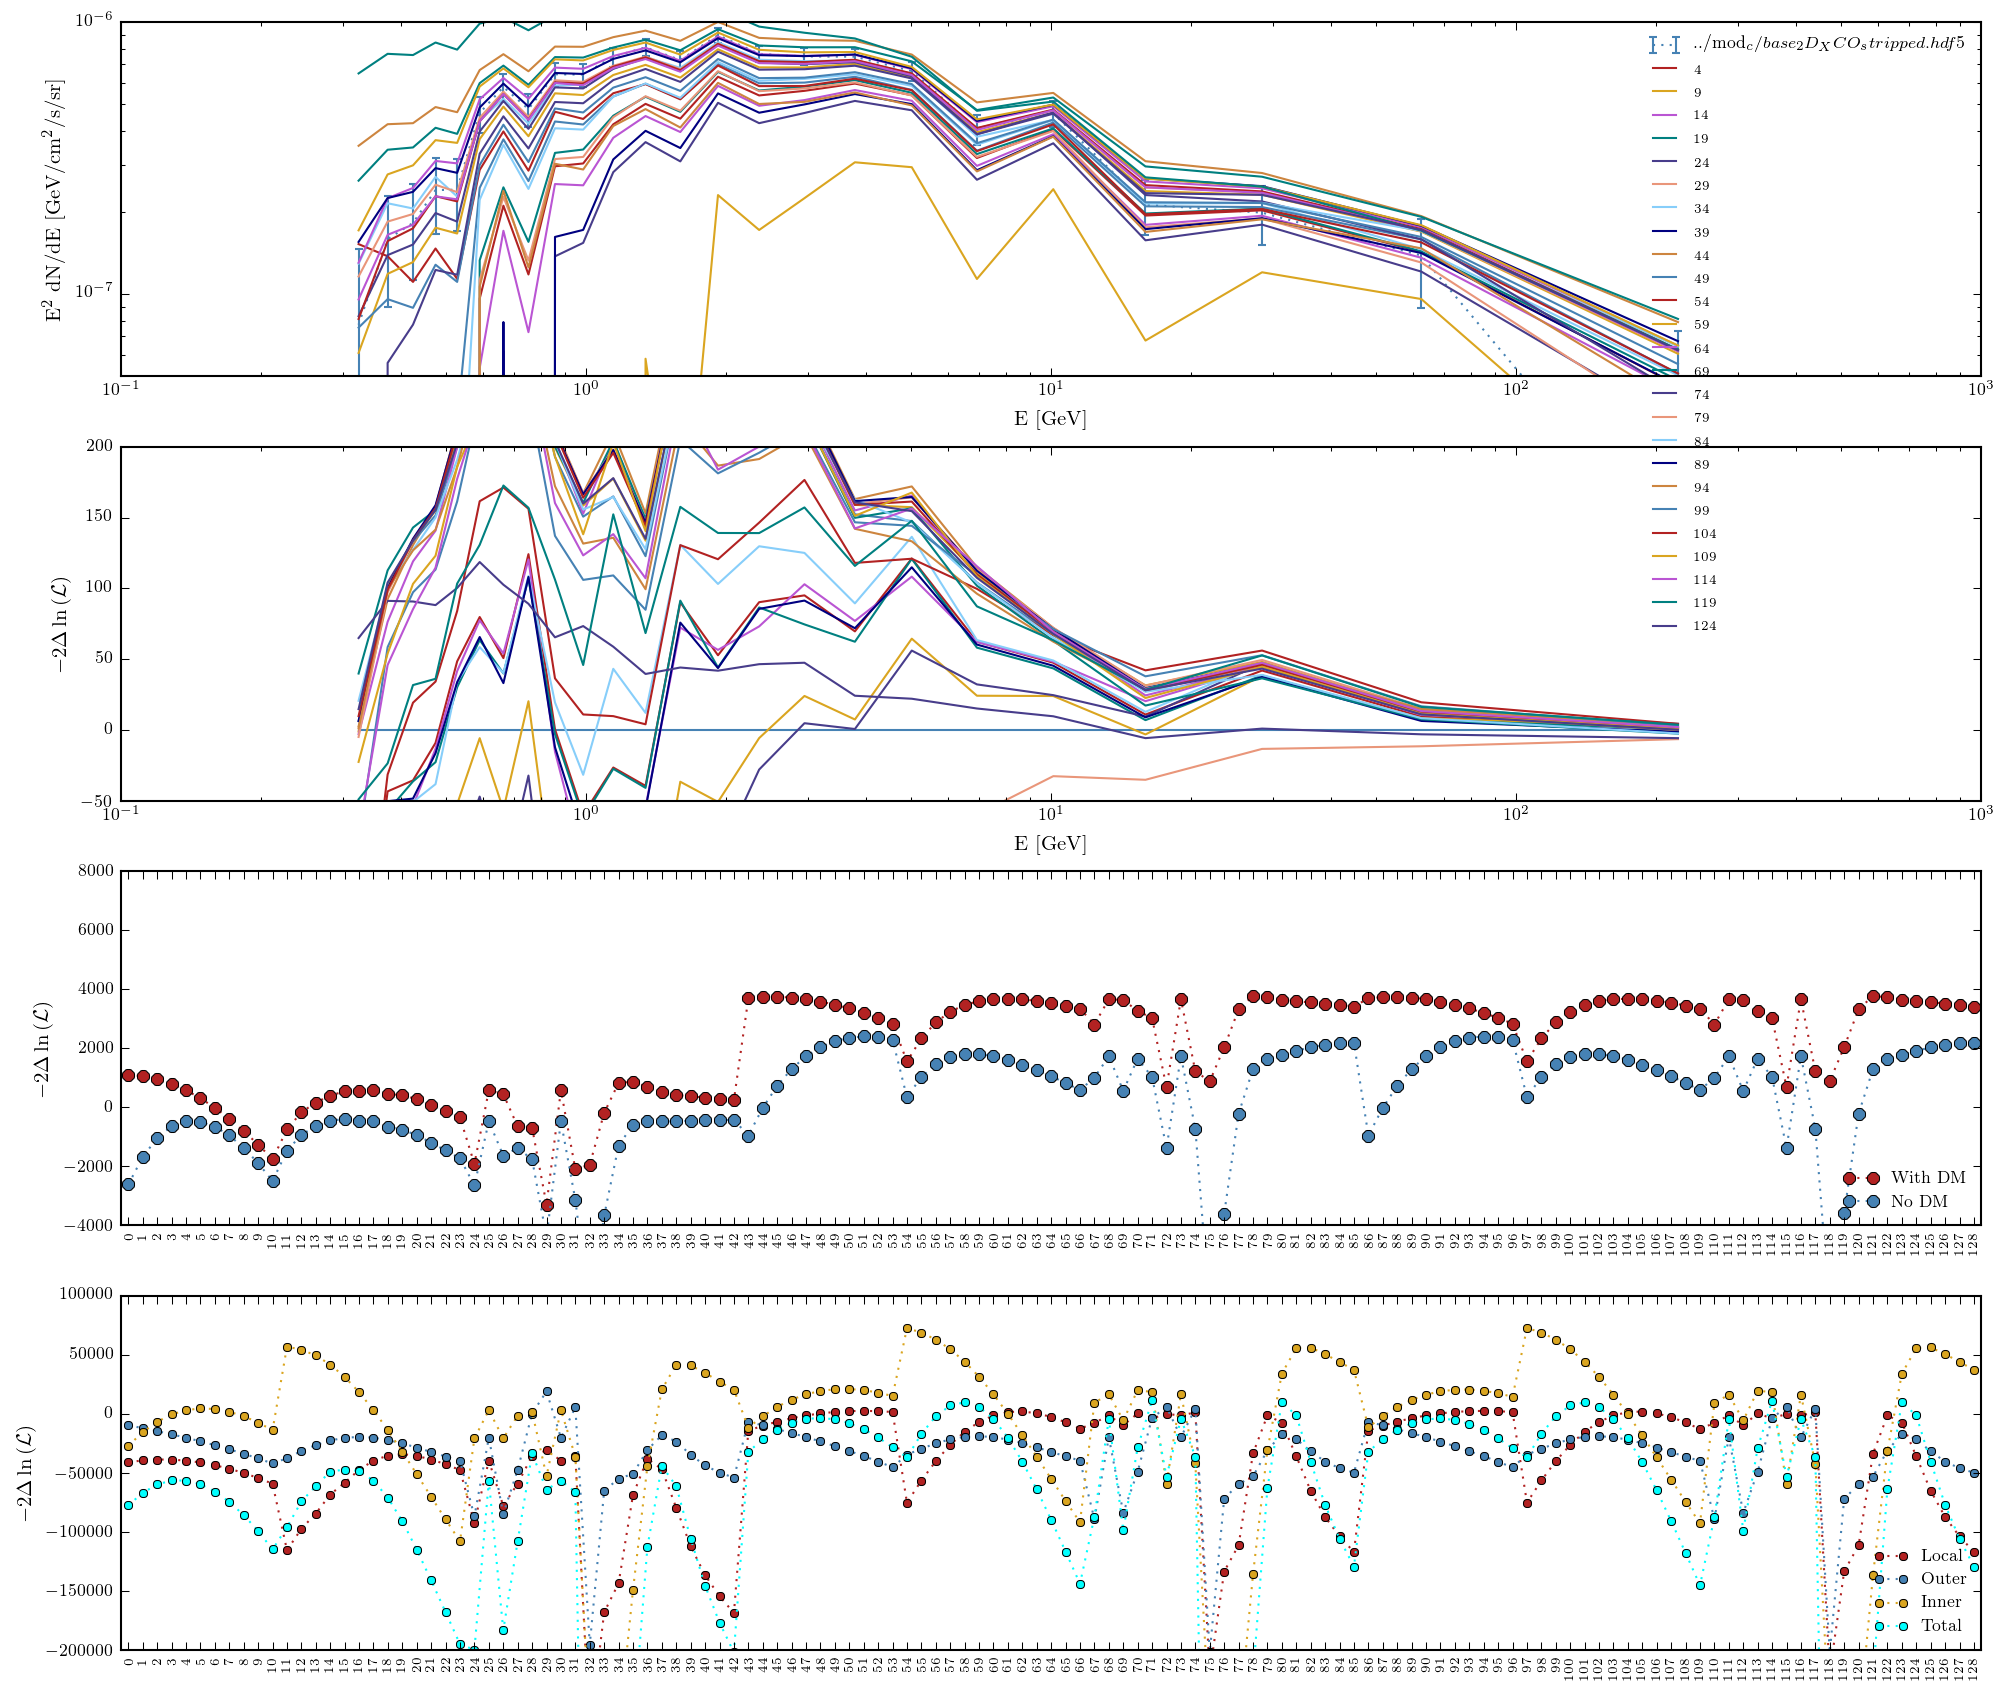

In [52]:
def PlotSeriesLong(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None):
    plt.figure(figsize=(16,14))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(411)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(412)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(413)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(411)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(412)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(413)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(414)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)

    
    

PlotSeriesLong(start=0, stop=129, text='all models', labels=['$_{'+str(i)+'}$' for i in range(0,129)], mod=5, ylim=(-4e3,8e3), ylim_glob=(-2e5,1e5))
plt.show()